In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from adjustText import adjust_text

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams["xtick.major.size"] = 2
plt.rcParams["ytick.major.size"] = 2
plt.rcParams['xtick.major.width'] = .5
plt.rcParams['ytick.major.width'] = .5

In [2]:
def get_volcano_data(comparsion):
    fname = 'Results/Differential/edgeR/%s.txt' % comparison
    df = pd.read_csv(fname, sep='\t', header=0, index_col=0)
    df = df.loc[:,['logFC', 'PValue', 'FDR']].copy()
    df['yval'] = -np.log10(df.PValue)
    df['Signif'] = np.logical_and(np.abs(df.logFC)>1,df.FDR<.05)
    df['Size'] = df.Signif.map({True:4, False:1})
    df['Color'] = df.Signif.map({True:'cyan', False:'gray'})
    
    return df

def label_scatter_plot(df_volc, label_count, ax):
    df_volc = df_volc.sort_values('PValue', ascending=True)
    df_volc = df_volc.iloc[:label_count]
    up_genes = df_volc.loc[df_volc.logFC>0].index
    down_genes = df_volc.loc[df_volc.logFC<0].index
    
    genes = up_genes.tolist() + down_genes.tolist()
    df_volc = df_volc.loc[genes,:]
    kwargs = {'ha':'center', 'va':'bottom', 'fontsize':8}
    texts = [ax.text(row.logFC, row.yval, gene, **kwargs) for gene, row in df_volc.iterrows()]
        
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'), ax=ax)
    
    return

def plot_volcano(df, ax, label_count=5):
    ax.tick_params(size=2, labelsize=8)
    ax.set_xlabel('Fold change (log2)', fontsize=12)
    ax.set_ylabel('P-value (-log10)', fontsize=12)
    ax.scatter(df.logFC, df.yval, s=df.Size, color=df.Color)
    
    if label_count > 0:
        label_scatter_plot(df_volc, label_count, ax)
    
    return

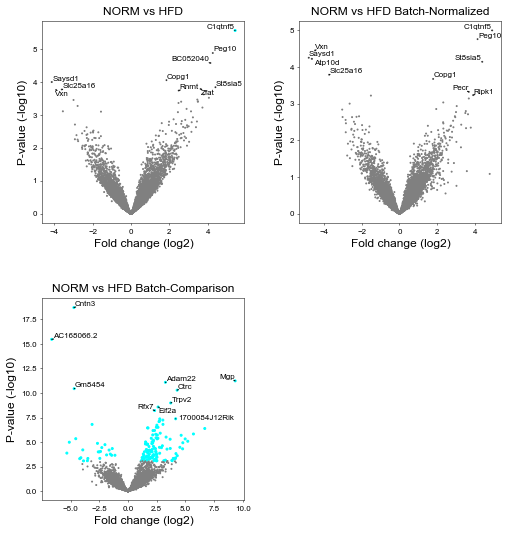

In [3]:
fig = plt.figure(figsize=(8.5,11))
comparisons = ['NORM vs HFD', 'NORM vs HFD Batch-Normalized', 'NORM vs HFD Batch-Comparison']

for num, comparison in enumerate(comparisons):
    df_volc = get_volcano_data(comparison)
    row = num // 2
    col = num % 2
    ax = fig.add_axes([0.150 + 0.420*col, 0.600 - 0.350*row, 0.330, 0.255])
    plot_volcano(df_volc, ax, label_count=10)
    ax.set_title(comparison, fontsize=12)

fig.savefig('Plots/Volcano Plot.pdf')
plt.show()

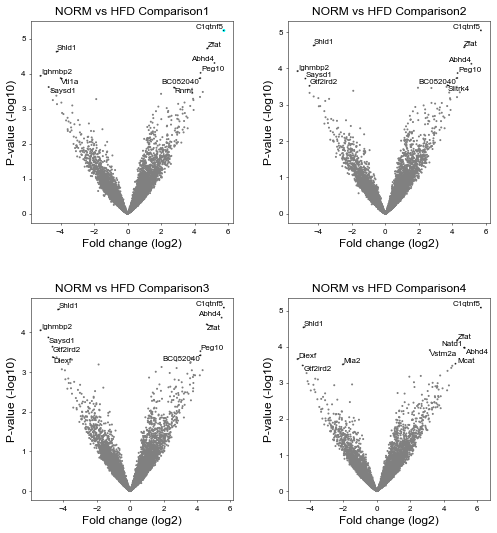

In [3]:
fig = plt.figure(figsize=(8.5,11))
comparisons = ['NORM vs HFD Comparison1', 'NORM vs HFD Comparison2', 'NORM vs HFD Comparison3', 'NORM vs HFD Comparison4']

for num, comparison in enumerate(comparisons):
    df_volc = get_volcano_data(comparison)
    row = num // 2
    col = num % 2
    ax = fig.add_axes([0.150 + 0.420*col, 0.600 - 0.350*row, 0.330, 0.255])
    plot_volcano(df_volc, ax, label_count=10)
    ax.set_title(comparison, fontsize=12)

fig.savefig('Plots/Volcano Plot_suggested comparison_CS.pdf')
plt.show()